In [1]:
# Importing pandas
import pandas as pd

In [2]:
df = pd.read_csv('Experience-Salary.csv')

In [3]:
# Seeing the top 5 rows
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [10]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [10]:
# Extracting the year from Months columns
df['exp(in year)'] = df['exp(in months)'] / 12

In [12]:
# Dropping again because it didn't help
df.drop('exp(in year)', inplace=True, axis=1)

In [13]:
df['salary'] = df['salary(in thousands)'].astype(int)

In [15]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [10]:
# EDA summarizing key Statistics
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


Visualization Phase

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Text(0.5, 1.0, 'Distribution of Salary')

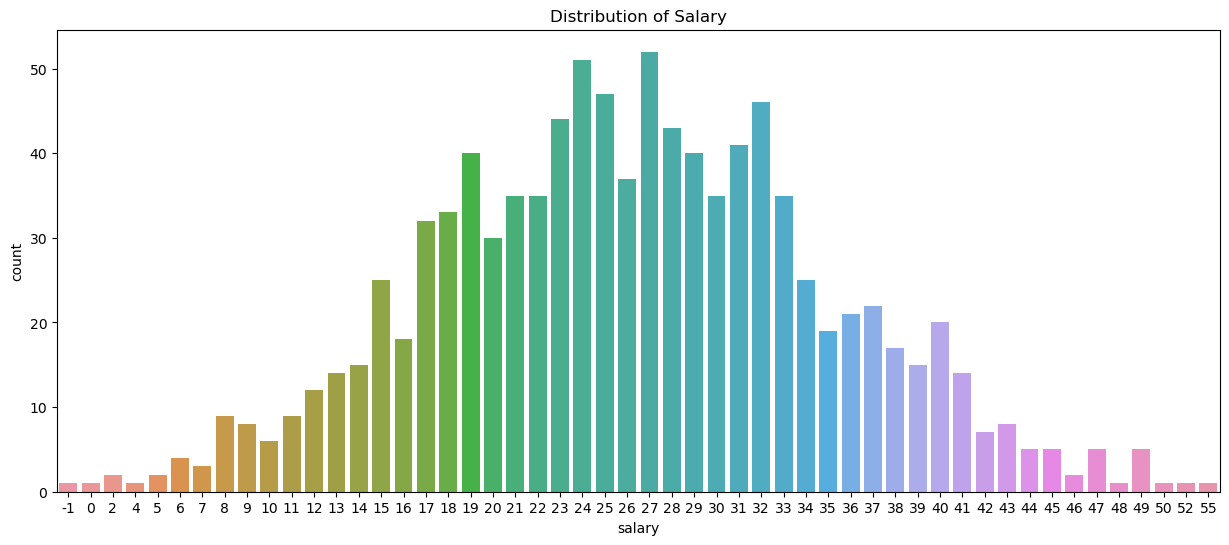

In [14]:
# Distribution of the Salary
plt.figure(figsize=(15, 6))
sns.countplot(x='salary', data=df)
plt.title('Distribution of Salary')

<Axes: xlabel='exp(in months)', ylabel='salary(in thousands)'>

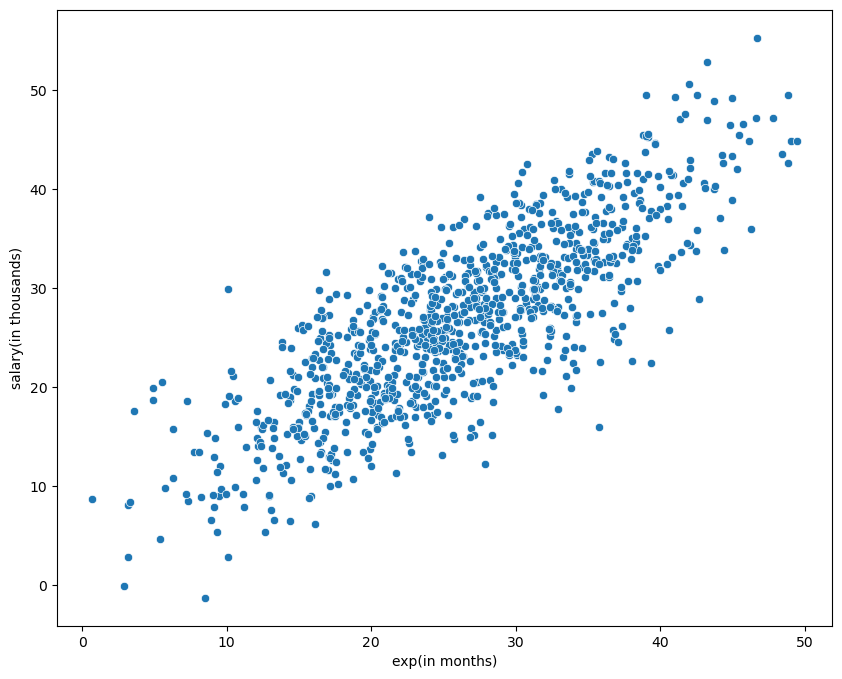

In [58]:
# ploting the ralation between experience and salary
plt.figure(figsize=(10, 8))
sns.scatterplot(x='exp(in months)', y='salary(in thousands)', data=df)

In [71]:
df.columns

Index(['exp(in months)', 'salary(in thousands)', 'salary', 'exp_year'], dtype='object')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

In [6]:
X = df['exp(in months)']
y = df['salary(in thousands)']
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

MEan Squared error: 27.650268732842278


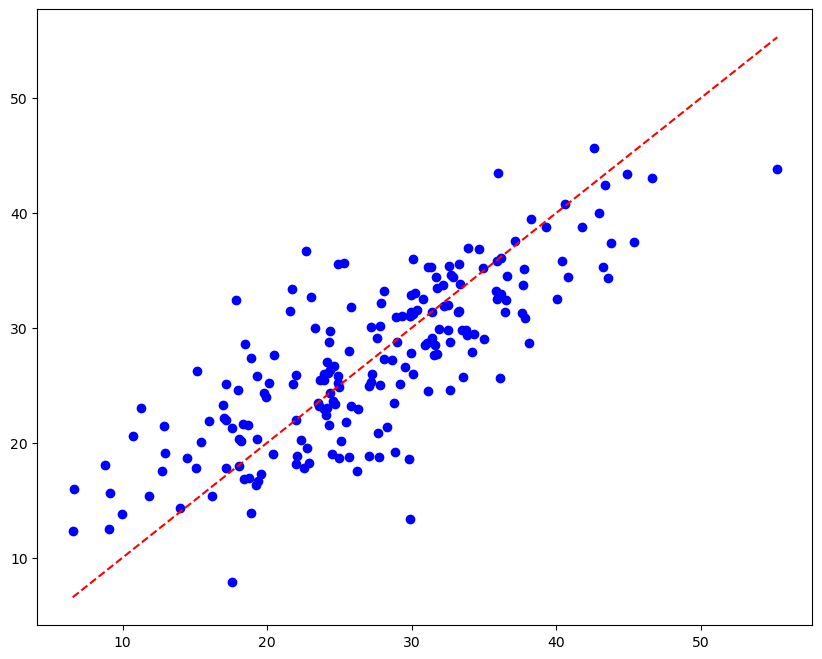

In [8]:
salary_model = LinearRegression()
salary_model.fit(X_train, y_train)
salary_pred = salary_model.predict(X_test)
ms_error = mean_squared_error(y_test, salary_pred)
print("MEan Squared error:", ms_error)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, salary_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

Regularization with both rigde lasso

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [9]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', ElasticNet())
])

param_grid = {
    'model__alpha': [0.01, 0.1, 1.0],
    'model__l1_ratio': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

E_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, E_pred)
print('MSE:', mse)

MSE: 27.64100988876713
